# Linear Regression Model for House Price Prediction


In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [1]:
pwd

'/Users/mac/Downloads'

In [4]:
# Step 2: Load the dataset

# Load dataset directly from online source
df = pd.read_csv("Taipei Housing Data.csv")

print("✅ Dataset Loaded Successfully!")
df.head()


✅ Dataset Loaded Successfully!


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Step 3: Exploratory Data Analysis

print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Rename columns for simplicity
df.columns = ["No", "transaction_date", "house_age", "distance_to_MRT", "convenience_stores", "latitude", "longitude", "price_per_unit_area"]

# Basic stats
df.describe()


Dataset Shape: (414, 8)

Data Types:
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Missing Values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


,No,transaction_date,house_age,distance_to_MRT,convenience_stores,latitude,longitude,price_per_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


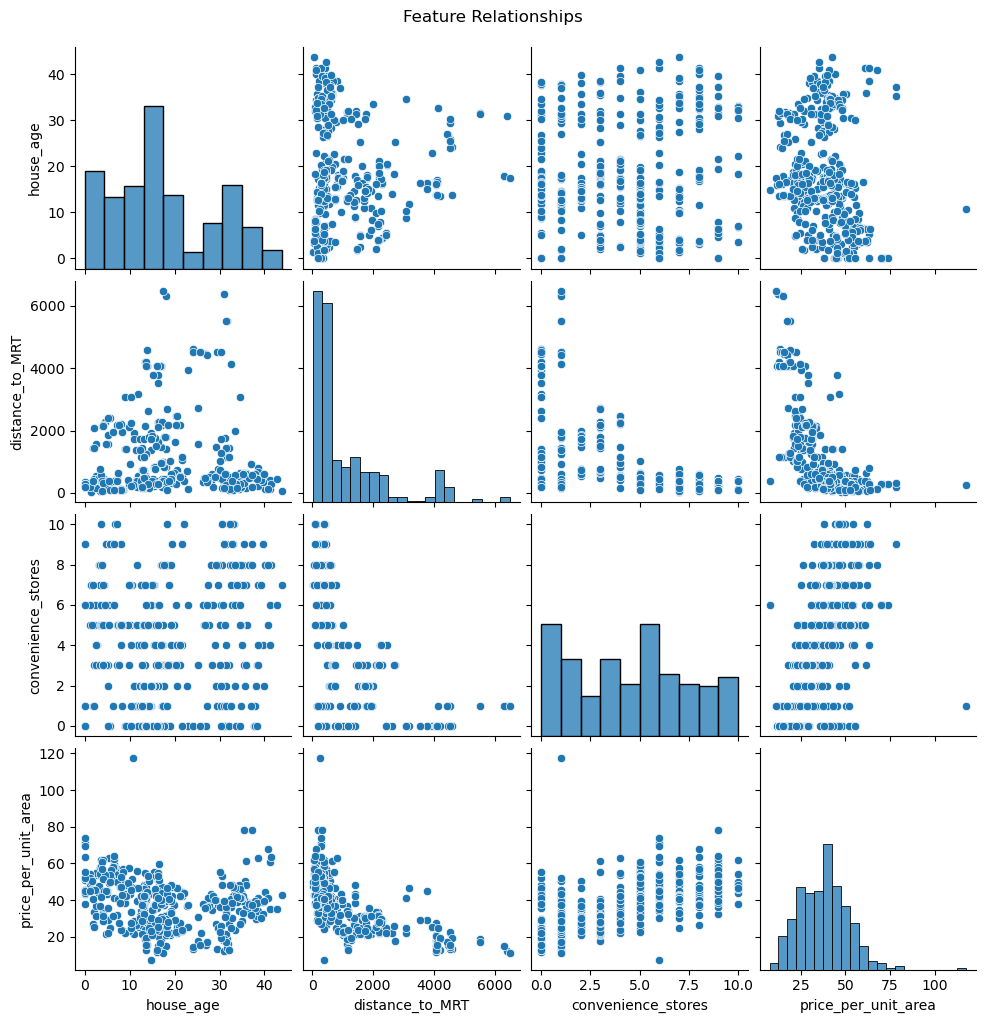

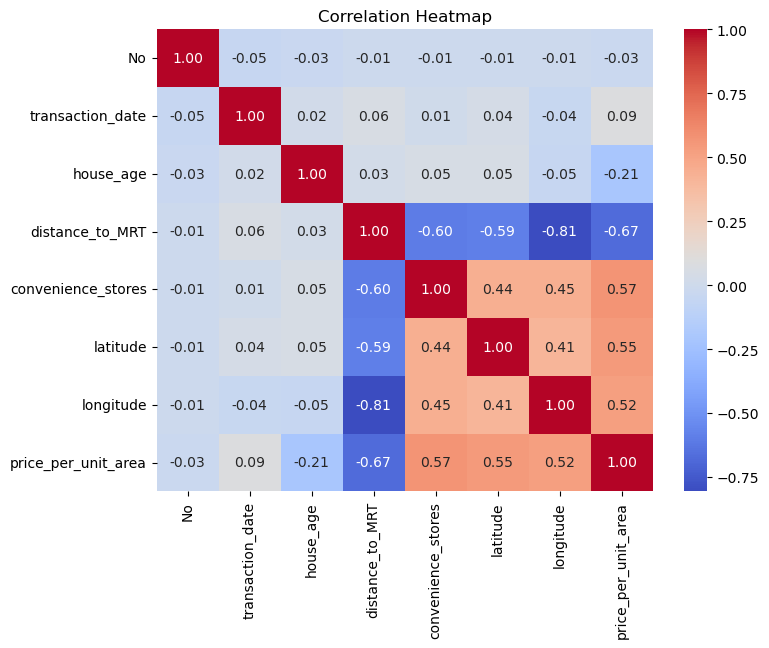

In [6]:
# Step 4: Visualize relationships

sns.pairplot(df[["house_age", "distance_to_MRT", "convenience_stores", "price_per_unit_area"]])
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
# Step 5: Feature selection and data preparation

# Drop unnecessary columns
df = df.drop(columns=["No", "transaction_date"], errors='ignore')

# Split into features and target
X = df.drop(columns=["price_per_unit_area"])
y = df["price_per_unit_area"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (331, 5)
Testing set size: (83, 5)


In [8]:
# Step 6: Train Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


In [9]:
# Step 7: Model evaluation

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 5.35
MSE: 54.58
RMSE: 7.39
R² Score: 0.6746


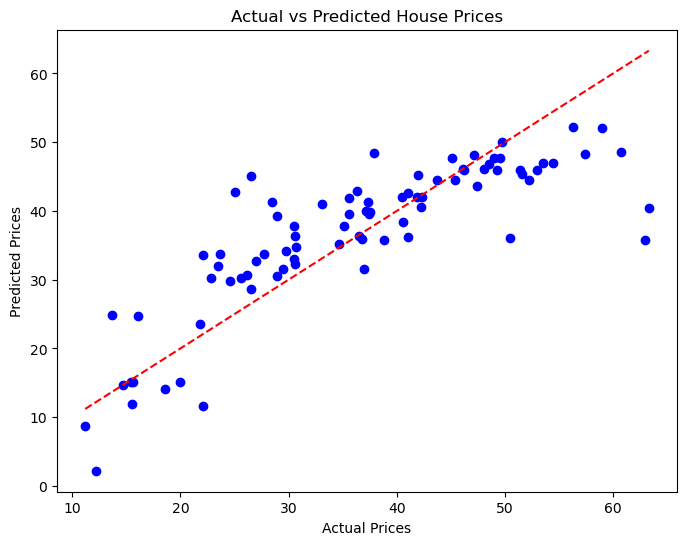

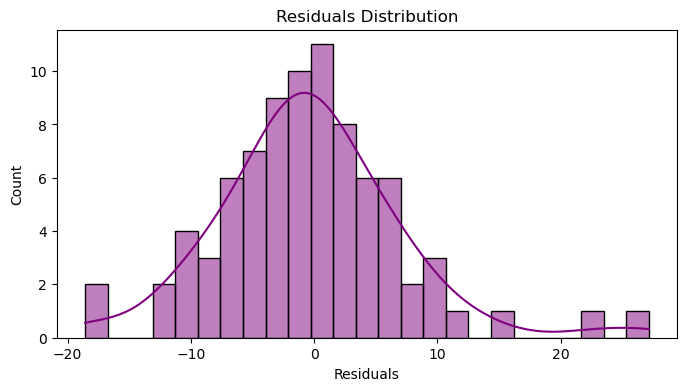

In [10]:
# Step 8: Visualize predictions

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=25, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


In [11]:
# Step 9: Coefficients and Interpretation

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
3,latitude,236.092831
2,convenience_stores,1.105121
1,distance_to_MRT,-0.004552
0,house_age,-0.270593
4,longitude,-23.903694
